# Première partie

L'objectif de cette partie est de réaliser une première mesure de la vitesse du son.

## 1. Quel est le matériel nécessaire pour réaliser cette expérience ?

Le matériel nécessaire à ce TP est un Haut-parleur, et deux microphones.

## 2. Comment peut-on mesurer la vitesse du son ?

Nous pouvons mesurer la vitesse du son en envoyant un son avec un haut-parleur. Deux microphones pourront acquérir le signal, en connaissant la distance entre les deux microphones nous pourrons déduire la vitesse du son.

$$ v = \frac{d}{t} $$

où $v$ est la vitesse du son, $d$ est la distance entre les deux microphones et $t$ est le temps que met le son pour parcourir cette distance.




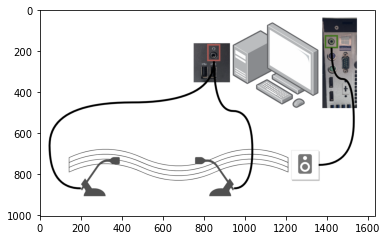

In [11]:
import matplotlib.image 
import matplotlib.pyplot as plt

image = matplotlib.image.imread("Maquette.png")
plt.imshow(image)
plt.show()

## 3. Quel outil vu en cours va nous permettre de déduire le décalage temporelle entre les deux acquisitions de nos microphones ? 

Nous devons utiliser l'intercorrélation pour faire un filtrage adapté afin d'isoler ce que l'haut-parleur envoie vers les microphones. L'intercorrélation est définie par :

$$
R_{xy}[m] = \sum_{n=-\infty}^{+\infty} x[n+m] y[n]
$$

Où x et y sont des signaux connus, en l'occurrence $y$ sera le signal capturé par le microphone et $x$ le son émis par l'haut-parleur.




In [ ]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
#Bibliothèques pour générer, acquérir les sons
import traitsignfip
from importlib import reload
reload(traitsignfip)

traitsignfip.init_volume() #Fonction permettante de régler le volume avant acquisition


data_left, data_right,samples = traitsignfip.play_and_record("whitenoise",2)

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.50#Distance entre les deux micros en mètre

#affichage du channel 1 
plt.figure()
plt.title("Acquisition micro gauche")
plt.plot(n,data_left)
plt.figure()
plt.title("Acquisition micro droite")
plt.plot(n,data_right)

corrLeft=scipy.signal.correlate(data_left,samples, mode='same')
corrRight=scipy.signal.correlate(data_right,samples, mode='same')
# Calcul de la corrélation croisée entre les deux signaux

plt.figure()
plt.title("Intercorrélation Gauche")
plt.plot(n,corrLeft)
#Intercorrélation gauche 
plt.figure()
plt.title("Intercorrélation Droite")
plt.plot(n,corrRight)
#Intercorrélation droite 

# Trouver l'indice du maximum de la corrélation
max_index_Left = np.argmax(corrLeft)/fs
max_index_Right = np.argmax(corrRight)/fs

delta_t = np.abs(max_index_Left - max_index_Right)

print("Temps PIC Gauche : "+str(max_index_Left))
print("Temps PIC Droit : "+str(max_index_Right))

print("Delta : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")


## 4. Comment peut-on minimiser les bruits captés par les microphones ?

On pourrait minimiser les bruits captés par les microphones en isolant l'acoustique autour des micros. Par exemple, on pourrait mettre de la mousse anéchoïque autour de la maquette pour absorber l'ensemble des potentiels échos créés par les différentes surfaces réfléchissantes autour de la maquette.

## 5. Etudier les acquisitions pour différents signaux générés par la librairie traitsignfip 

2.0080045351473923
2.0066893424036283


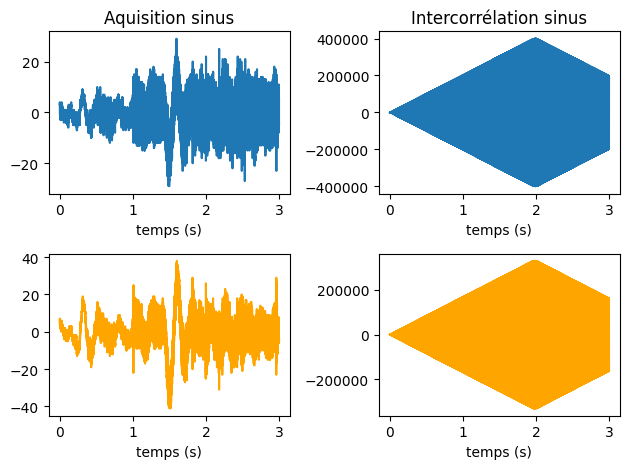

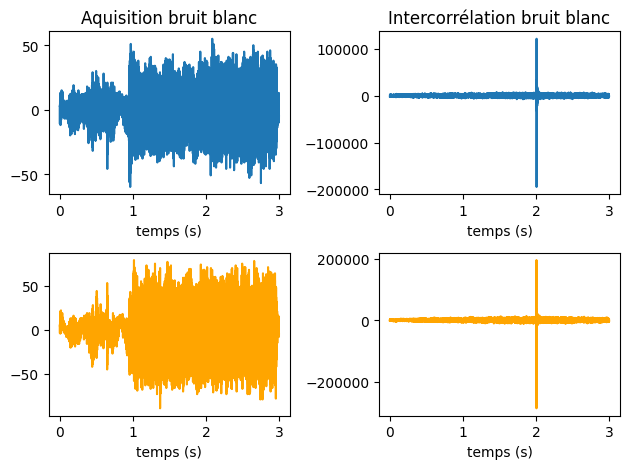

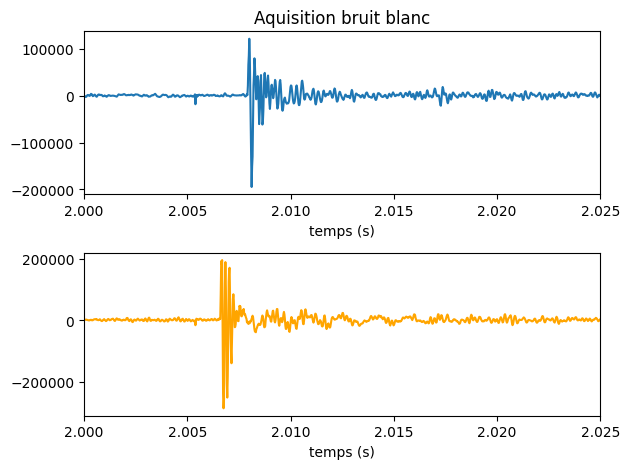

In [13]:
import scipy.io.wavfile
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np

#Sinus
rate, data = scipy.io.wavfile.read('sinus.wav')#Lecture du fichier où l'acquisition a été enregistrée 
data_right = data[:,1]
data_left = data[:,0]



samples=(np.sin(2 * np.pi * np.arange(44100 * 2 ) * 440 / 44100)).astype(np.float32)


corrLeft=scipy.signal.correlate(data_left,samples, mode='same')
corrRight=scipy.signal.correlate(data_right,samples, mode='same')

n = np.arange(0,len(data))/44100

fig, axs = plt.subplots(2, 2)
axs[0, 0].set_title("Aquisition sinus")
axs[0, 0].set_xlabel("temps (s)")
axs[0, 0].plot(n,data_left)
axs[1, 0].set_xlabel("temps (s)")
axs[1, 0].plot(n,data_right,'orange')
axs[0, 1].set_title("Intercorrélation sinus")
axs[0, 1].set_xlabel("temps (s)")
axs[0, 1].plot(n,corrLeft)
axs[1, 1].set_xlabel("temps (s)")
axs[1, 1].plot(n,corrRight,'orange')

plt.tight_layout()

#White noise
rate, data = scipy.io.wavfile.read('bruitblanc.wav')#Lecture du fichier où l'acquisition a été enregistrée 
rate, samples =scipy.io.wavfile.read('bruitblancsample.wav')

samples = samples/44100

data_right = data[:,1]
data_left = data[:,0]

corrLeft=scipy.signal.correlate(data_left,samples, mode='same')
corrRight=scipy.signal.correlate(data_right,samples, mode='same')

n = np.arange(0,len(data))/44100

fig, axs = plt.subplots(2, 2)
axs[0, 0].set_title("Aquisition bruit blanc")
axs[0, 0].set_xlabel("temps (s)")
axs[0, 0].plot(n,data_left)
axs[1, 0].set_xlabel("temps (s)")
axs[1, 0].plot(n,data_right,'orange')

axs[0, 1].set_title("Intercorrélation bruit blanc")
axs[0, 1].set_xlabel("temps (s)")
axs[0, 1].plot(n,corrLeft)
axs[1, 1].set_xlabel("temps (s)")
axs[1, 1].plot(n,corrRight,'orange')

plt.tight_layout()
fig, axs = plt.subplots(2)
axs[0].set_title("Aquisition bruit blanc")
axs[0].set_xlabel("temps (s)")
axs[0].plot(n,corrLeft)
axs[0].set_xlim(2,2.025)
axs[1].set_xlabel("temps (s)")
axs[1].plot(n,corrRight,'orange')
axs[1].set_xlim(2,2.025)
plt.tight_layout()

max_index_Left = np.argmax(corrLeft)/44100
max_index_Right = np.argmax(corrRight)/44100

print(max_index_Left)
print(max_index_Right)

Sur les figures ci-dessus, nous pouvons voir que l'intercorrélation du bruit blanc permet de déduire plus facilement le décalage temporel entre les deux signaux.

L'intercorrélation du sinus (figure 1) est en forme de losange.

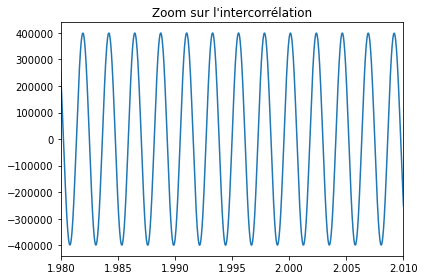

In [80]:
#Sinus
rate, data = scipy.io.wavfile.read('sinus.wav')#Lecture du fichier où l'acquisition a été enregistrée 
data_right = data[:,1]
data_left = data[:,0]



samples=(np.sin(2 * np.pi * np.arange(44100 * 2 ) * 440 / 44100)).astype(np.float32)


corrLeft=scipy.signal.correlate(data_left,samples, mode='same')
corrRight=scipy.signal.correlate(data_right,samples, mode='same')

n = np.arange(0,len(data))/44100

plt.figure()
plt.title("Zoom sur l'intercorrélation")
plt.plot(n,corrLeft)
plt.xlim(1.98,2.01)


plt.tight_layout()

Sur le zoom ci-dessus, on peut voir plusieurs sinusoïdes de même amplitude, ce qui rend difficile l'obtention du maximum de l'intercorrélation. Cela explique pourquoi le signal sinusoïdal n'est pas optimal pour effectuer une mesure de la vitesse du son.

# Deuxième partie

Dans cette partie, nous allons mesurer la vitesse du son en utilisant seulement deux microphones. Nous devrons générer nous-mêmes un signal pour remplacer l'haut-parleur.

En effet, pour générer un signal significatif sans haut-parleur, nous pouvons utiliser un clap avec nos mains ou un bruit blanc.

Une intercorrélation entre les deux signaux nous permettra d'obtenir un décalage temporel, puis nous pourrons en déduire la vitesse du son.

Delta t : 0.00199546485260771
Vitesse : 350.7954545454545 m/s


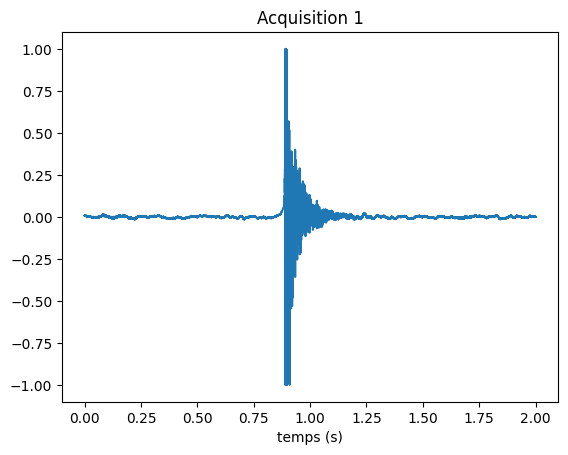

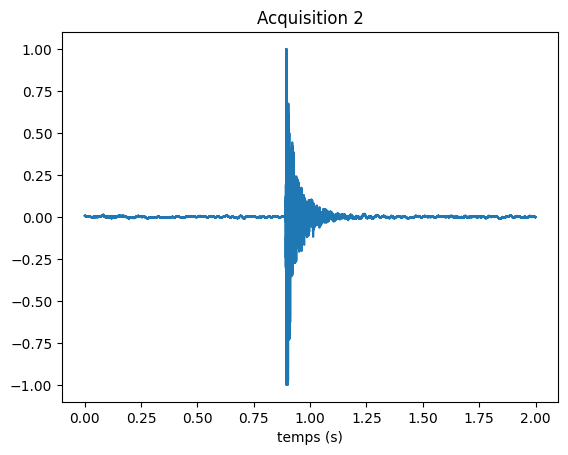

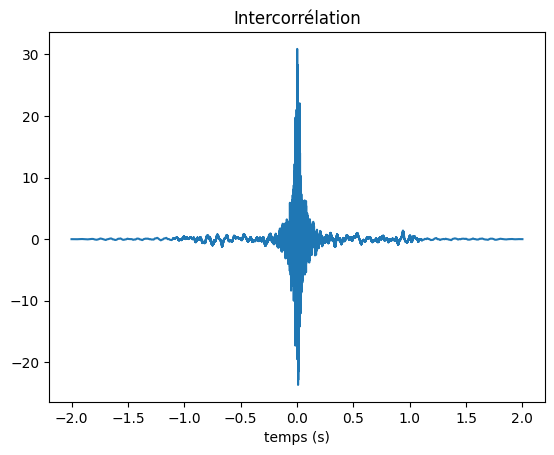

In [9]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitsignfip
from importlib import reload
reload(traitsignfip)



data_left, data_right = traitsignfip.record(2)

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.7#Distance entre les deux micros en mètre


plt.figure()
plt.title("Acquisition 1")
plt.xlabel("temps (s)")
plt.plot(n,data_right)
plt.figure()
plt.title("Acquisition 2")
plt.xlabel("temps (s)")
plt.plot(n,data_left)

corr = scipy.signal.correlate(data_left,data_right,mode="full")

mid = len(corr)//2
abcisse=np.arange(-len(data_left)+1,len(data_left))/44100

plt.figure()
plt.title("Intercorrélation")
plt.xlabel("temps (s)")
plt.plot(abcisse,corr)


delta_t = (np.argmax(corr)-mid)/44100

print("Delta t : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")